In [1]:
%pylab inline
import pynbody

Populating the interactive namespace from numpy and matplotlib


In [14]:
path='/mnt/is2/fstasys/ITV/base09/out/'
s0=pynbody.load(path+'snapshot_008')

In [16]:
mdm=s0['mass']

In [4]:
t=np.loadtxt('/mnt/is2/fstasys/ITV/base09/rockstar/out_0.list',skiprows=16)

In [10]:
cut, = np.where (t[:,7]>=10)

In [11]:
halos=len(t[cut,7])
print('cantidad de halos de interes:',halos)

cantidad de halos de interes: 850350


In [58]:
dh=halos/(500**3)

In [18]:
ddm=(3*(100**2)*(0.276))/(8*np.pi*(4.3e-9))
mp=ddm*(500**3)/(512**3)/1e10
print('masa de particula:',mp)
print('menor masa de halo:',mp*10)

masa de particula: 7.135462886550386
menor masa de halo: 71.35462886550387


In [20]:
tr=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/halosprop_R.dat')
ts=np.loadtxt('/home/arodriguez/Void-s-Gastrophysics/PostSemi/halosprop_S.dat')
masa_dm=0.09328805
masa_gs=0.018172996

In [21]:
mhl_r=tr[:,7]*masa_dm+tr[:,8]*masa_gs+tr[:,6]*masa_gs
mhl_s=ts[:,7]*masa_dm+ts[:,8]*masa_gs+ts[:,6]*masa_gs

In [46]:
cut_r, = np.where((mhl_r>71.3 ) & (tr[:,0]< 40))
cut_s, = np.where((mhl_s>71.3 ) & (ts[:,0]< 40))

In [71]:
bines=20
halos_r=np.zeros(bines)
radio=np.zeros(bines)
rmax=40
abin=rmax/bines
radio=np.arange(0,rmax,abin)
vol=np.zeros(bines)
dr=np.zeros(bines)
for i in range(len(mhl_r[cut_r])):
    bn=int((tr[cut_r,0][i]/abin))
    halos_r[bn] = halos_r[bn] + 1

r0=0
for i in range(len(vol)):
    vol[i]=((4./3.)*np.pi*(radio[i]**3-r0**3))
    dr[i]=((halos_r[i]/vol[i]-dh)/dh)
    r0=radio[i]
    
radio=np.arange(0,rmax,abin) + abin/2.
len(vol)

/home/arodriguez/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


20

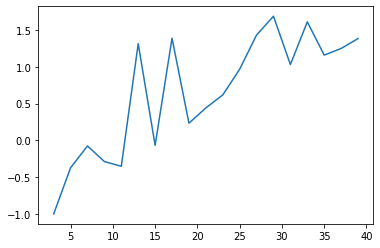

In [72]:
plt.plot(radio,dr)